In [21]:
from utils.datareader import DBpediaReader
from utils.datareader import CIFAR100Reader
from deepmf.deepmf import deepmf
from hiernmf2.hier_nmf import hier8_neat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_reader = CIFAR100Reader()
image_reader.get_data_matrix()

## 1. Sample of some sub-categories

In [13]:
fine_label_list = image_reader.meta_dict[b'fine_label_names']
coarse_label_list = image_reader.meta_dict[b'coarse_label_names']
fine_label_list = [b.decode() for b in fine_label_list]
coarse_label_list = [b.decode() for b in coarse_label_list]

In [20]:
for i,coarse_label in enumerate(coarse_label_list):
    fine_labels = image_reader.label_sm.fine_labels[image_reader.label_sm.coarse_label == i]
    unique_fine_labels = list(fine_labels.unique())
    unique_fine_labels = [fine_label_list[u] for u in unique_fine_labels]
    print("{}. {}: [{}]".format(str(i),str(coarse_label), ', '.join(unique_fine_labels)))

0. aquatic_mammals: [beaver, dolphin, otter, seal, whale]
1. fish: [aquarium_fish, flatfish, ray, shark, trout]
2. flowers: [orchid, poppy, rose, sunflower, tulip]
3. food_containers: [bottle, bowl, can, cup, plate]
4. fruit_and_vegetables: [apple, mushroom, orange, pear, sweet_pepper]
5. household_electrical_devices: [clock, keyboard, lamp, telephone, television]
6. household_furniture: [bed, chair, couch, table, wardrobe]
7. insects: [bee, beetle, butterfly, caterpillar, cockroach]
8. large_carnivores: [bear, leopard, lion, tiger, wolf]
9. large_man-made_outdoor_things: [bridge, castle, house, road, skyscraper]
10. large_natural_outdoor_scenes: [cloud, forest, mountain, plain, sea]
11. large_omnivores_and_herbivores: [camel, cattle, chimpanzee, elephant, kangaroo]
12. medium_mammals: [fox, porcupine, possum, raccoon, skunk]
13. non-insect_invertebrates: [crab, lobster, snail, spider, worm]
14. people: [baby, boy, girl, man, woman]
15. reptiles: [crocodile, dinosaur, lizard, snake, tu

## 2. Visualize sample data

In [31]:
X=image_reader.X_lg.T*255
X = X.reshape(3000,3,32,32)
X = X.transpose(0,2,3,1).astype(np.uint8)

In [63]:
i

0

In [78]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

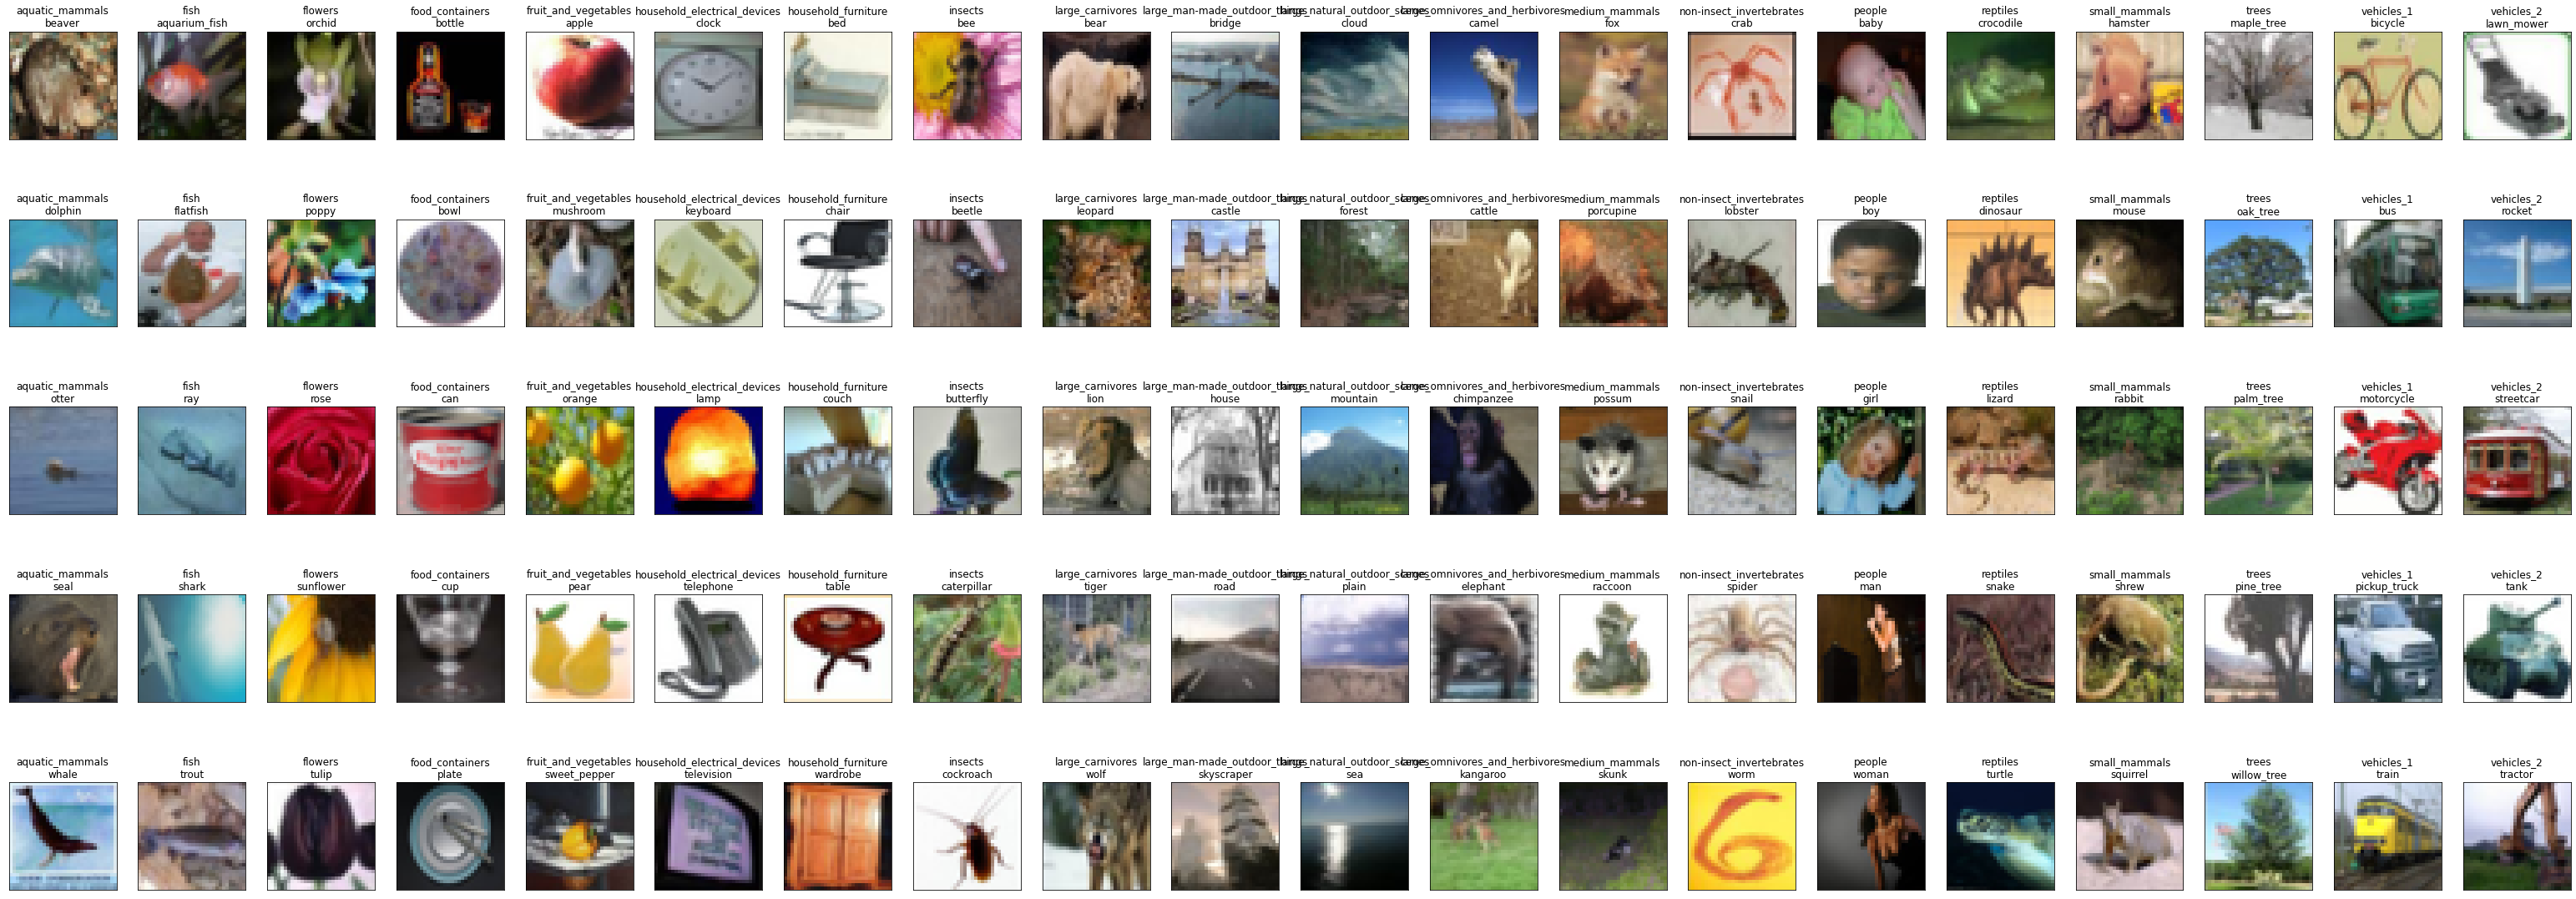

In [81]:
coarse_num = 20
fig=plt.figure(figsize=(55, 20))
for i in range(coarse_num):
    fine_labels = image_reader.label_lg.fine_labels[image_reader.label_lg.coarse_label == i]
    unique_fine_labels = list(fine_labels.unique())
    for j in range(5):
        fl = unique_fine_labels[j]
        sample_id = image_reader.label_lg[(image_reader.label_lg.coarse_label == i) & (image_reader.label_lg.fine_labels == fl)].sample(1).index[0]
        x = X[sample_id]
        fig.add_subplot(5, 20, 20*j+i+1)
        plt.imshow(x)
        plt.xticks([])
        plt.yticks([])
        plt.title("{}\n{}".format(coarse_label_list[i], fine_label_list[fl]))
plt.show()        


## 3. Run NMFs and deep MF  for the data

### 3.1. Run hierNMF2

In [96]:
Ws[:,is_leaf == 1].shape

(3072, 100)

In [97]:
leaf_ids = np.where(is_leaf == 1)

In [98]:
leaf_ids[0]

array([  2,   4,   5,   6,  18,  26,  33,  34,  35,  37,  38,  40,  42,
        44,  48,  49,  50,  51,  52,  55,  56,  57,  58,  59,  60,  62,
        64,  65,  66,  68,  71,  72,  73,  75,  76,  80,  81,  82,  86,
        87,  88,  89,  93,  97, 100, 102, 104, 105, 106, 109, 110, 111,
       115, 116, 117, 118, 119, 121, 130, 132, 133, 134, 135, 136, 139,
       140, 141, 146, 148, 149, 153, 155, 157, 158, 159, 160, 161, 162,
       163, 165, 166, 168, 169, 170, 171, 172, 173, 174, 177, 182, 184,
       187, 188, 189, 190, 191, 192, 195, 196, 197])

In [82]:
k=100
parent, children, leaf_label, is_leaf, timings, Ws, Hs, priorities = hier8_neat(image_reader.X_sm, k)

0.8110215386686217
0.8147756404196227
0.7993929028212836
0.8317849757952552
0.8550328372557151
0.8640612825048829
0.8709260906266628
0.8771503388240962
0.8612347868819077
0.8496312502004723
0.8400848143020663
0.8841674568460998
0.8392531435565026
0.8365246973805578
0.8874152031145621
0.8451818955317738
0.875981253847228
0.8341383925421669
0.8328665503144886
0.8574956570126213
0.8534529924167306
0.8321021893252707
0.8306855776433384
0.8367103691620804
0.8283657192891096
0.8244453117982393
0.8544416457896669
0.8373896220845612
0.8210731882967842
0.8176613097873044
0.892320776687862
0.8732854240386216
0.8105642282354737
0.8069578618507344
0.8120682574409265
0.8266884740418845
0.805889982663063
0.8043366616513289
0.8532529983427577
0.8626920987691212
0.8373433274682374
0.8628951241996634
0.8515034385401665
0.8370878903852266
0.8031772901571379
0.8311838370106389
0.827172098754731
0.8506063555561563
0.8168736928336685
0.8255386759111236
0.8032894958249818
0.8027772999742487
0.80192015466613

In [91]:
priorities.shape

(198,)

In [93]:
is_leaf

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [94]:
leaf_label[is_leaf]

array([2, 2, 6, 2, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2,
       2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 6, 6, 6, 2, 6, 6, 2, 6, 2, 6, 2,
       6, 2, 2, 2, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 6,
       6, 2, 6, 2, 2, 6, 6, 6, 2, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 6, 6,
       6, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 6, 2, 6, 2, 6, 6, 6, 2, 2, 6,
       6, 6, 2, 2, 2, 6, 6, 6, 6, 6, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2,
       6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 2, 2, 2, 2, 6, 2, 6, 6, 2, 2, 2, 6,
       2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2,
       2, 6, 2, 2, 2, 2, 6, 2, 6, 2, 2, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6])